In [77]:
#importandoa as biblioetcas usadas para a preparação dos dados e predição
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
#importando as biblioteca da api
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder
#buscando todos os jogos
result = leaguegamefinder.LeagueGameFinder()
todosJogos = result.get_data_frames()[0]

In [79]:
#tranformando os dados da api em um dataframe
df = pd.DataFrame(todosJogos)

In [80]:
#retirando os dados que nao sera usado na api
df.drop(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID','GAME_DATE', 'MATCHUP'], axis=1, inplace=True)
df.head()

,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,None,0,0,0,0,NaN,0,0,NaN,0,...,NaN,0,0,0,0,0,0,0,0,2.0
1,None,0,0,0,0,NaN,0,0,NaN,0,...,NaN,0,0,0,0,0,0,0,0,-2.0
2,W,239,102,39,96,0.406,5,27,0.185,19,...,0.905,12,45,57,20,8,10,12,24,7.0
3,L,240,102,37,93,0.398,14,38,0.368,14,...,0.667,16,35,51,22,9,4,13,23,-2.0
4,L,240,95,32,87,0.368,11,32,0.344,20,...,0.800,3,43,46,20,8,1,16,21,-7.0


In [81]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['WL'] = pd.get_dummies(df['WL'])

In [82]:
#importando o algoritmo de vou uzar para a prediçao e inicializando
from sklearn.linear_model import LogisticRegression

In [83]:
#importando para separar dos dados de teste e de treino
from sklearn.model_selection import train_test_split

In [84]:
#separando a base de dados
x = df.drop('WL',axis=1)
x = x.fillna(x.mean())
y = df['WL']
y = y.fillna(y.mean())

In [85]:
#separando os dados de treino de teste sendo 40% para teste e 60% para treino e escolhedo o um random 
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3,random_state=101)
aux = y_teste.reset_index()
aux.drop('index',axis=1,inplace=True)

In [86]:
#prenchendo os dados faltantes com a media dos valores
x_treino = x_treino.fillna(x_treino.mean())
x_teste = x_teste.fillna(x_teste.mean())
y_treino = y_treino.fillna(y_treino.mean())
y_teste = y_teste.fillna(y_teste.mean())

In [87]:
logModel = LogisticRegression()

In [88]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
#treinando o algorlitmo
logModel.fit(x_treino,y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
#fazendo a prediçao
predicao = logModel.predict(x_teste)

Text(0, 0.5, 'Y valor predito')

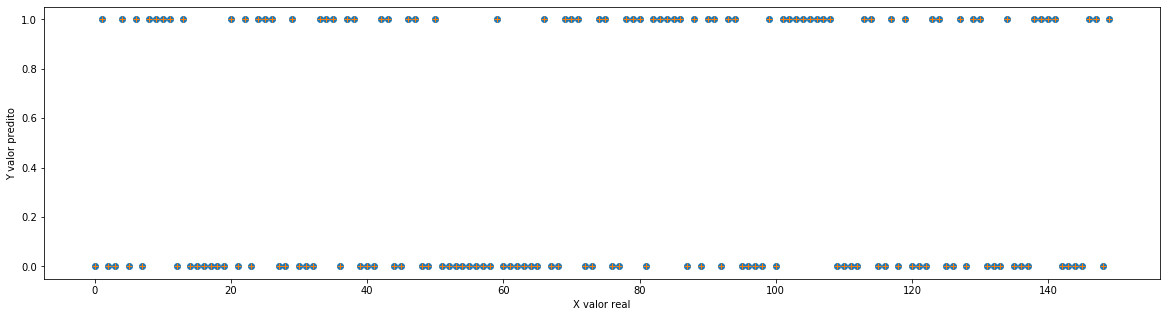

In [90]:
plt.figure(figsize=(20,5))
plt.plot(aux[:150], 'o')
plt.plot(predicao[:150], '+')
plt.xlabel('X valor real')
plt.ylabel('Y valor predito')

In [91]:
from sklearn import metrics
#MAE é o mais fácil de entender, porque é o erro médio.
#MSE é mais popular que o MAE, porque a MSE "puniria" erros maiores, o que tende a ser útil no mundo real.
#RMSE é ainda mais popular do que MSE, porque o RMSE é interpretável nas unidades "y".
print('MAE:', metrics.mean_absolute_error(y_teste, predicao))
print('MSE:', metrics.mean_squared_error(y_teste, predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, predicao)))

MAE: 0.569
MSE: 0.004555555555555556
RMSE: 0.0674948557710553


In [92]:
print('Variance score: %.2f' % logModel.score(x_teste,aux))

Variance score: 1.00


In [93]:
#fazendo a predicao usando cross-valodation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logModel,x,y, cv=10)

In [94]:
print('Variance Cros-Validation rscore: %.2f' % max(scores))

Variance Cros-Validation rscore: 1.00


In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_teste,predicao))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4511
           1       1.00      1.00      1.00      4489

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



In [97]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_teste,predicao))

[[4490   21]
 [  20 4469]]
